# End to end Machine Learning Project

## Outline

1. Steps in ML projects

2. Illustration through practical set up

## ML Project

- Excellent wine company wants to develop ML model for **predicting wine quality** on certain **physiochemical characteristics** in order to replace expensive quality sensor.

- Let's understand steps involved in addressing this problem.

## Steps in ML projects

1. Look at the big picture.

2. Get the data.

3. Discover and visualize the data to gain insights.

4. Prepare the data for Machine Learning algorithms.

5. Select a model and train it.

6. Fine-tune your model.

7. Present your solution.

8. Launch, monitor and maintain your system.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **STEP 1 :** Data Loading

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

data = pd.read_csv(data_url,sep =';')

### **STEP 2 :** Exploring the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
features = data.columns[:-1].values 
labels = [data.columns[-1]]

print('Features List: ',features)
print('Labels List: ',labels)

Features List:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Labels List:  ['quality']


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
print(data['quality'].value_counts())


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


**Visualization**

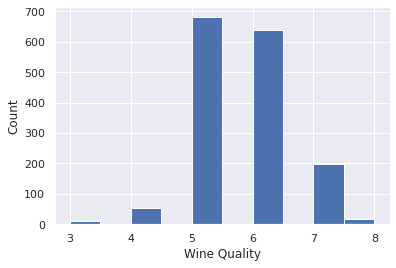

In [7]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

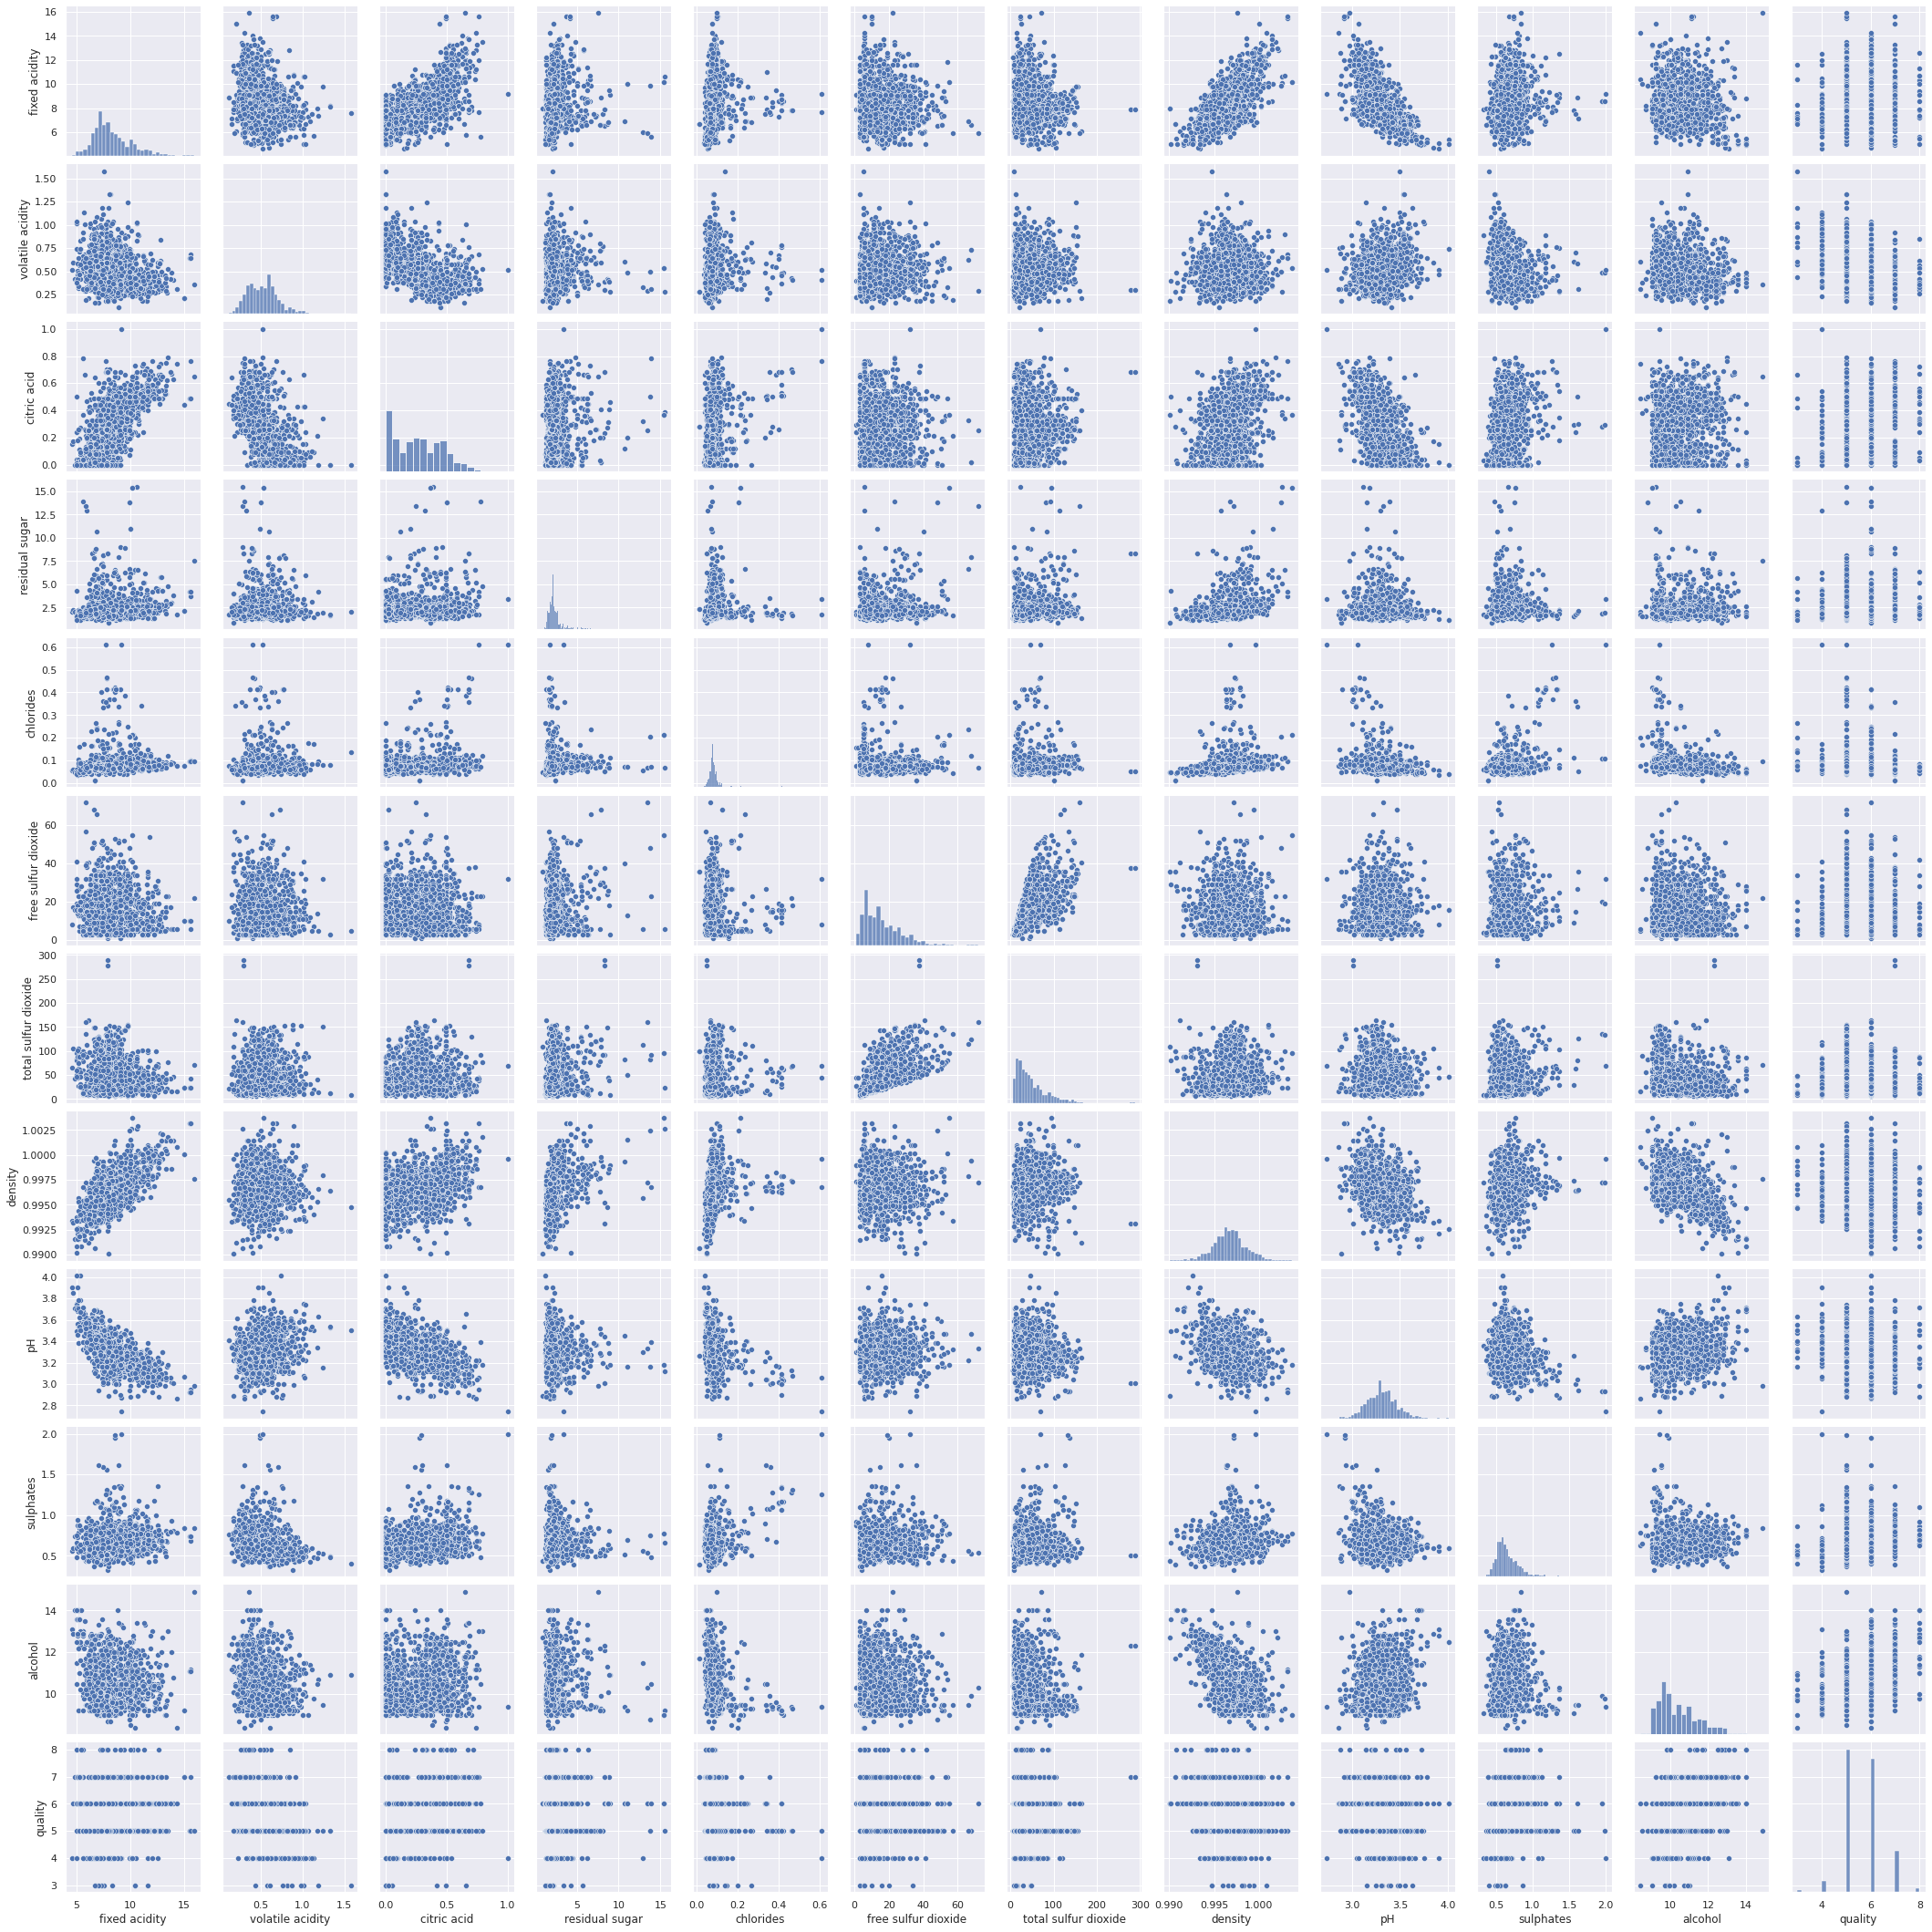

In [8]:
sns.pairplot(data)

##### **TRAIN-TEST SPLIT**

Writing a function to split the data into training and test. Make sure to set the seed so that we get the same test set in the next run.

In [9]:
def split_train_test(data, test_ratio):
    #set the random seed
    np.random.seed(42)

    #shuffle the dataset
    shuffled_indices = np.random.permutation(len(data))

    #calculate the size of the test set.
    test_set_size = int(len(data)*test_ratio)

    #split dataset to get trainning and test sets.
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set = split_train_test(data, 0.2)

In [10]:
from sklearn.model_selection import train_test_split
train_set, testa_set = train_test_split(data, test_size=0.2, random_state=42)

##### **STRATIFIED - SHUFFLE SPLIT**

In [11]:
from re import split
from sklearn.model_selection import StratifiedShuffleSplit 

split_data= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split_data.split(data, data["quality"]):
    strat_train_set= data.loc[train_index]
    strat_test_set=data.loc[test_index]

strat_dist= strat_test_set['quality'].value_counts() / len(strat_test_set)

overall_dist= data['quality'].value_counts() / len(data)

##### **DISTRIBUTION - COMPARISION**

In [12]:
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})

dist_comparison['diff(s-o'] = dist_comparison['stratified'] - dist_comparison['overall']

dist_comparison['diff(s-o)_pct'] = 100 * (dist_comparison['diff(s-o']/dist_comparison['overall'])
print(dist_comparison)


    overall  stratified  diff(s-o  diff(s-o)_pct
5  0.425891    0.425000 -0.000891      -0.209251
6  0.398999    0.400000  0.001001       0.250784
7  0.124453    0.125000  0.000547       0.439698
4  0.033146    0.034375  0.001229       3.708726
8  0.011257    0.009375 -0.001882     -16.718750
3  0.006254    0.006250 -0.000004      -0.062500


In [13]:
#let's contrast this with random sampling
random_dist = test_set['quality'].value_counts()/len(test_set)
random_dist

6    0.413793
5    0.407524
7    0.131661
4    0.028213
8    0.015674
3    0.003135
Name: quality, dtype: float64

Compare the difference in distribution of stratified and uniform sampling: stratified sampling gives us test distribution closer to the overall distribution than the random sampling.

### **STEP 3 :** Data Visualization

* performed on training set in case of large data set.

* sample examples to form **exploration set**

* Enables to understand features and their relationship among themselves and with output labels.

* In our case we have a small training data and we use it all for data exploration. There is no need to create a separate exploration set.

* It's good idea to create a copy of the training set so that we can freely manipulate it without worrying about any manipulation in the original set.


In [14]:
exploration_set= strat_train_set.copy()

#### 1. Scatter plot

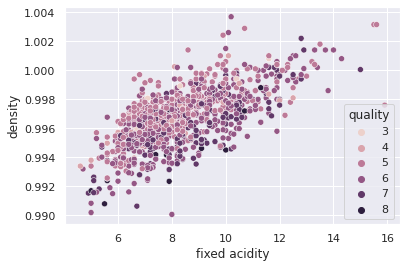

In [15]:
sns.scatterplot(x='fixed acidity' , y='density' ,hue ='quality', data=exploration_set)
plt.show()

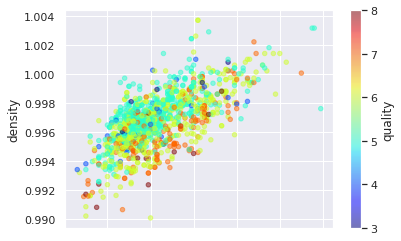

In [16]:
exploration_set.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5,c='quality',cmap=plt.get_cmap('jet'))
plt.show()

#### 2. Standard correlation coefficient between features.

* Ranges between -1 to +1
* Correlation = +1 means Strong positive correlation between features
* Correlation = -1 means Strong negative correlation between features
* Correlation = 0 means No linear correlation between features
* Visualizaiton with **heatmap** only captures linear relationship between features
* For non-linear relationship, we use **rank correlation**


In [17]:
corr_matrix = exploration_set.corr()

Checking features that are correlated with the label,i.e quality in our case.

In [18]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.481197
sulphates               0.228050
citric acid             0.210802
fixed acidity           0.107940
residual sugar          0.003710
free sulfur dioxide    -0.048291
pH                     -0.052063
chlorides              -0.120231
density                -0.193009
total sulfur dioxide   -0.194511
volatile acidity       -0.383249
Name: quality, dtype: float64

Notice that **quality** has strong positive correlation with **alcohol** content [0.48] and strong negative correlation with **volitile acidity** [-0.38]

Visualization of correlation matix using Heatmap : 

<AxesSubplot:>

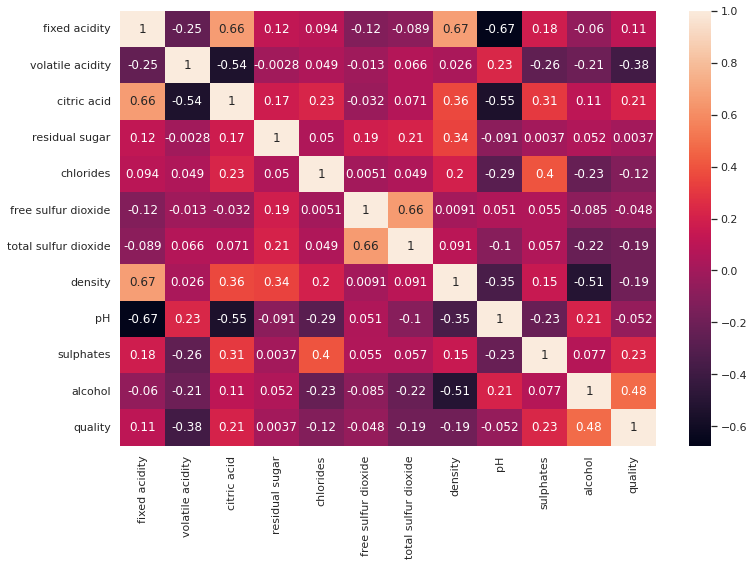

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, yticklabels=True,cbar=True,annot=True)

We can notice:
* The correlation coefficient on diagonal is +1.
* Darker colors represent negative correlations, while fainer colors denote positive correlations. For example :
    * citric acid and fixed acidity have strong positive correlation.
    * pH and fixed acidity have strong negative correlation.

Another option to visualize the relationship between the feature is with **scatter matrix**.


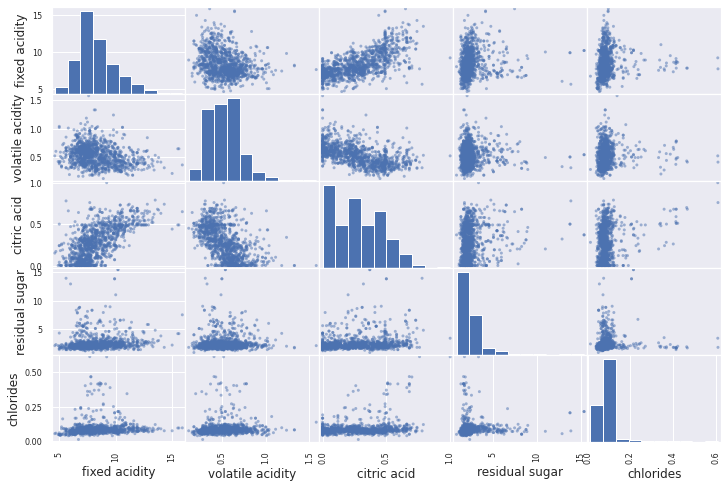

In [20]:
from pandas.plotting import scatter_matrix 
attribute_list = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides']

scatter_matrix(exploration_set[attribute_list], figsize=(12,8))
plt.show()

For convenience of visualization, we show it for a small number of attributes/features.

Similar analysis can be carried out with combined features-features that are derived from the original features.

> Notes of wisdom
1. Visualization and data exploration do not have to be absolutely thorough.

2. Objective is to get quick insight into features and its relatioship with other features and labels.

3. Exploration is an iterative process: Once we build model and obtain more insights, we can come back to this step.

### **STEP 4 :** Prepare data for ML algorithm

We often need to preprocess the data before using it for model building due to variety of reasons.

* Due to errors in data capture, data may contain outliers or missing values

* Different features may be at different scales.

* The current data distribution is not exactly amenable to learning.

Typical steps in data preprocessing are as follows : 

1. Separate features and labels.

1. Handling missing values and outliers

1. Feature scaling to bring all features on the same scale.

1. Applying certain transformations like log, square root on the features.


It is a good practive to make a copy of the data and apply preprocessing on that copy.

This ensures that in case something goes wrong, we will at least have original copy of the data intact.


#### 1. Separation of features and labels

In [21]:
# Copy all features leaving aside the label.

wine_features = strat_train_set.drop('quality', axis=1)
wine_labels = strat_train_set['quality'].copy()

#### 2. Data Cleaning

##### 2.A. Handling missing values

 First check if there are any missing values in feature set. One way to find that out is column-wise.

In [22]:
# counts the number of Nan in each column of wine_features
wine_features.isna().sum()  

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In case, we have non-zero numbers in any columns, we have a problem of missing values

* These values are missing due to errors in recording or they do not exist.

* if they are not recorded:
    * use imputation technique to fill up the missing values

    * Drop  the rows containig missing values
    
    
* if they do exists, it is better to keep it as NaN.

Sklearn provides the following methods to drop rows conatining missing values:

        1. dropna()
        
        2. drop() 

If provides *SimpleImputer* class for filling up missing values with say, median value.

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

imputer.fit(wine_features)

SimpleImputer(strategy='median')

In case, the features contains non-numeric attributes, they need to be dropped before calling the fit method on imputer object.

Let's check the statistics learnt by the imputer on the training set:

In [24]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

Note that these are median values for each feature. We can cross-check it by calculating median on the feature set:

In [25]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

Finally we use the trained imputer to transform the training set such that the missing values are replaced by the medians.

In [26]:
transf_features = imputer.transform(wine_features)
transf_features.shape

(1279, 11)

This returns a Numpy array and we can convert it to the dataframe if needed:

In [27]:
wine_features_transf = pd.DataFrame(transf_features, columns=wine_features.columns)

In [28]:
wine_features_transf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
2,11.9,0.570,0.50,2.6,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
3,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
4,10.4,0.260,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.90


##### 2.B. Handling text and categorical attributes



**ORDINAL ENCODING :**

* Converts categories to numbers

* Call `fit_transform()` method on ordinal_encoder object to convert text to numbers.

* The list of categories can be obtained via `categories_` instance variable.

One issue with this representation is that the ML algorithm would assume that the two nearby values are closer than the distinct ones


In [29]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

**ONE-HOT ENCODING :**

* Converts categorical variables to *binary* variables.

* In other words, we create one binary feature per category - the feature value is 1 when the category is present, else it is 0.

* One feature is 1 (hot) and the rest are 0 (cold).

* The new features are referred to as *dummy features*.
Scikt-Learn provides a `OneHotEncoder` class to convert categorical values into one-hot vectors.


In [30]:
from sklearn.preprocessing import OneHotEncoder 
one_hot_encoder = OneHotEncoder()

* We need to call `fit_transform()` method on OneHotEncoder object.

* The output is a SciPy sparse matrix rather than NumPy array. This enables us to save space when we have a huge nuber of categories.

* In case we want to convert it to dense reprersentation, we can do with `toarray()` method.

* The list of categories can be obtained via `categories_` instance variable

* As we observed that when the number of categories are very large, the one-hot encoding would result in a very large number of features.

* This can be addressed with one of the following approaches:
  
  * Replace with categorical numberical features
  
  * Convert into low-dimensional learnable vectors called `embeddings` 

#### 3.Feature Scaling 
* Most ML algorithms do not perform well when input features are on very different scales.

* Scaling of target label is generally not required.

##### 3.A. Min-Max Scaling or Normalization
* Scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1.

* We subtract minimum value of a feature from the current value and divide it by the difference between minimum and the maximum value of that feature.

* Scikit-Lean provides `MinMaxScalar` transformer for this.

* One can specify hyperparameter `feature_range` to specify the range of the feature.

##### 3.B. Standardization
* Scaling technique where the values are centered around the mean with a unit standard deviation.

* We subtract mean value of each featurer from the current value and divide it by the standard deviation so that the resulting feature has a unit variance.

* While `normalization`bounds values between 0 and 1, `standardization` does not bound values to a specific range.

* Standardization is less affected by the outliers compared to the normalization.

* Scikit-Learn provides `StandardScalar` transformation for features standardization.

* Note that all these transformers are learnt on the traning data and then applied on the training and test data to transform them.

**Never learn these transformers on the full dataset** 


#### Transformation Pipeline
Scikit-Learn provides a Pipeline class to line up transformations in an intended order.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

estimators = [('SimpleImputer', SimpleImputer()), ('StandardScaler', StandardScaler())]

pipe = Pipeline(steps=estimators)
transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standardscaler', StandardScaler())])

wine_features_tr = transform_pipeline.fit_transform(wine_features)

Let's understand what is happening here:
* `Pipeline` has a sequence of transformations-missing value imputation followed by standardization.

* Each step is the sequence is define by **name,estimator** pair.

* Each name should be unique and should not contain __ (double underscore)

* The output of one step is passed on the next one in sequence until it reaches the last step.

* Here the pipeline first performs imputation of missing values and its result is passed for standardization.

* The pipeline exposes the same method as the final estimator.
    
    * Here StandardScalar is the last estimator and since it is a transformer, we call `fit_transform()` method on the `Pipleline` object. 

#### Transforming Mixed Features

* The real world data has both categorical as well as numerical features and we need to apply different transformations to them.

* Scikit-Learn introduced `ColumnTransformer` class to handle this.

In [32]:
from sklearn.compose import ColumnTransformer

* The `ColumnTransformer` applies each transformation to the appropriate columns and then concatenates the outputs along the columns.

* Note that all transformers must return the same number of rows.
* The numeric transformers return **dense** matrix while the categorical ones return **sparse** matrix. 

* The ColumnTransformer automatically determines the type of the output based on the density of resulting matrix.

### **STEP 5 :** Select and Train ML model

It is a good practice to build a quick baseline model on the preprocessed data and get an idea about model performance.

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

* Now that we have a working model of a regression, let's evaluate performance of the model on training as well as test sets.

* For regression models, we use mean squared error as an evaluation measure.

In [34]:
from sklearn.metrics import mean_squared_error

quality_pred = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_pred)

0.4206571060060278

Let's evaluate performance on the test set.

We need to first apply transformation on the test set and then apply the model prediction function.


In [35]:
# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)

#copy the label list
wine_labels_test = strat_test_set['quality'].copy()

#apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

#call predict function and calculate MSE.
quality_test_pred = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_pred)


0.39759130875015186

Let's visualize the error between the actual and predicted values.

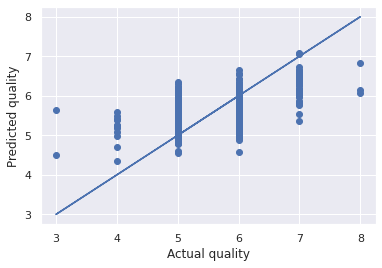

In [36]:
plt.scatter(wine_labels_test, quality_test_pred)
plt.plot(wine_labels_test, wine_labels_test, 'b-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')
plt.show()

Let's try another model: DecisionTreeRegressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

In [38]:
quality_pred = tree_reg.predict(wine_features_tr) 
print('Training Error :', mean_squared_error(wine_labels, quality_pred))

quality_test_pred = tree_reg.predict(wine_features_test_tr)
print('Test Error : ',mean_squared_error(wine_labels_test, quality_test_pred))

Training Error : 0.0
Test Error :  0.58125


Note that the training error is 0, while the test error is 0.58. This is an example of an overfitted model.

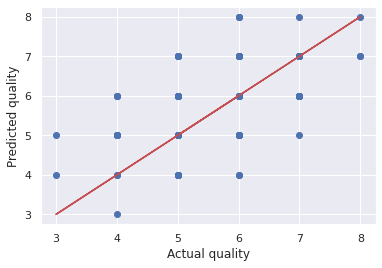

In [39]:
plt.scatter(wine_labels_test, quality_test_pred)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')
plt.show()

##### **Cross-Validation (CV)**

* Cross validation provides a separate MSE for each validation set, which we can use to get a mean estimation of MSE as well as the standard deviation, which helps us to determine how precise is the estimate.

* The additional cost we pay in cross validation is additional training runs, which may be too expensive in certain cases.

In [40]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores : \n", scores)
    print()
    print("Mean : ", scores.mean())
    print("Standard deviation : ", scores.std())

**Linear Regression CV**

In [41]:
scores = cross_val_score(lin_reg, wine_features_tr,
                        wine_labels, scoring="neg_mean_squared_error", cv=10)

lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores : 
 [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]

Mean :  0.431639217212196
Standard deviation :  0.0835635973041396


**DecisionTreeRegressor CV**

In [42]:
scores = cross_val_score(tree_reg, wine_features_tr,
                        wine_labels, scoring="neg_mean_squared_error", cv=10)

tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores : 
 [0.6171875  0.6875     0.6328125  0.5078125  0.4609375  0.640625
 0.65625    0.7109375  0.859375   1.07874016]

Mean :  0.6852177657480315
Standard deviation :  0.16668343331737054


Upon comparision of scores of the two models, we can see that the LinearRegressor has better MSE and more precise estimation compared to DecisionTree.


**RandomForest CV**

* Random forest model builds multiple decision trees on randomly selected features and then average their predictions.

* Building a model on top of other model is called * ensemble learning *
Which is often used to improve performance of ML models.

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(wine_features_tr, wine_labels)

scores = cross_val_score(rf_reg, wine_features_tr,
                         wine_labels, scoring="neg_mean_squared_error", cv=10)

rf_mse_scores = -scores
display_scores(rf_mse_scores)

Scores : 
 [0.36989922 0.41363672 0.29063438 0.31722344 0.21798125 0.30233828
 0.27124922 0.38747344 0.42379219 0.46229449]

Mean :  0.34565226131889765
Standard deviation :  0.0736322184302973


In [44]:
quality_pred = rf_reg.predict(wine_features_tr)
print('Training Error :', mean_squared_error(wine_labels, quality_pred))

quality_test_pred = rf_reg.predict(wine_features_test_tr)
print('Test Error : ',mean_squared_error(wine_labels_test, quality_test_pred))

Training Error : 0.04695613760750586
Test Error :  0.34449875


* Random forest looks more promising than the other two models.

* It's good practice to build a few such models quickly without tuning their hyperparameters and shortlist a few promising models among them.

* Also save the methods to the disk in Python `pickle` format.

### **STEP 6 :** FineTune the model

* Usually there are a number of hyperparameters in the model, which are set
manually.

* Tuning these hyperparameters lead to better accuracy of ML models.
* Finding the best combination of hyperparameters is a search problem in the
space of hyperparameters, which is huge.

#### **Grid Search**

In [45]:
from sklearn.model_selection import GridSearchCV

* We need to specify a list of hyperparameters along with the range of values to try.

* It automatically evaluates all possible combinations of hyperparameter values using cross-validation.

* For example, there are number of hyperparameters in RandomForest regression
such as:
  * Number of estimators

  * Maximum number of features

In [46]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

Here the parameter grid contains two combinations:
1. The first combination contains n_estimators with 3 values and max_features with 4 values.

2. The second combination has an additional bootstrap parameter, which is set to
False. Note that it was set to its default value, which is True, in the first grid.

Let's compute the total combinations evaluated here:
1. The first one results in 3 × 4 = 12 combinations.

2. The second one has 2 values of n_estimators and 3 values of max_features, thus resulting 2 × 3 = 6 in total of values.

The total number of combinations evaluated by the parameter grid 12 + 6 = 18.

Let's create an object of GridSearchCV:

In [47]:
grid_search = GridSearchCV(rf_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

In this case, we set cv=5 i.e. using 5 fold cross validation for training the model.

We need to train the model for 18 parameter combinations and each combination
would be trained 5 times as we are using cross-validation here.

The total model training runs = 18 × 5 = 90

In [48]:
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best parameter combination can be obtained as follows: 

In [49]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

Let's find out the error at different parameter settings:

In [50]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(-mean_score, params)

0.5096674155773421 {'max_features': 2, 'n_estimators': 3}
0.38494794730392157 {'max_features': 2, 'n_estimators': 10}
0.35890284926470584 {'max_features': 2, 'n_estimators': 30}
0.4765907543572984 {'max_features': 4, 'n_estimators': 3}
0.37949047181372547 {'max_features': 4, 'n_estimators': 10}
0.3677285709422658 {'max_features': 4, 'n_estimators': 30}
0.47674223856209147 {'max_features': 6, 'n_estimators': 3}
0.39086173406862745 {'max_features': 6, 'n_estimators': 10}
0.35285364923747276 {'max_features': 6, 'n_estimators': 30}
0.47786049836601296 {'max_features': 8, 'n_estimators': 3}
0.37944690563725486 {'max_features': 8, 'n_estimators': 10}
0.35524742306644874 {'max_features': 8, 'n_estimators': 30}
0.4390253948801742 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3897452818627451 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4490985838779956 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3858988664215686 {'bootstrap': False, 'max_feature

As you can notice the lowest MSE is obtained for the best parameter combination. Let's obtain the best estimator as follows :

In [51]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

**NOTE** : GridSearchCV is initialized with `refit=True` option, which retrians the best estimator on the full training set. This is likely to lead us to a better model as it is trained on a larger dataset.


#### **Randomized Search**

* When we have a large hyperparameter space, it is desirable to try RandomizedSearchCV.

* RandomizedSearchCV is a wrapper around the RandomizedSearchCV class in the scikit-learn library.

* It selects a random value for each hyperparameter at the start of each iteration and repeats the process for the given number of random combinations.

* It enables us to search hyperparameter space with appropriate budget control.

In [52]:
from sklearn.model_selection import RandomizedSearchCV

#### **Analysis of best model and its errors**
Analysis of the model provides useful insights about features. Let's obtain the feature importance as learnt by the model.

In [53]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.05388861, 0.1266557 , 0.05822554, 0.05641645, 0.05791189,
       0.04626635, 0.08045273, 0.07275072, 0.05712442, 0.14163643,
       0.24867117])

In [54]:
sorted(zip(feature_importances ,features) ,reverse=True)

[(0.2486711653610271, 'alcohol'),
 (0.14163642739406354, 'sulphates'),
 (0.12665569639367016, 'volatile acidity'),
 (0.08045272518319231, 'total sulfur dioxide'),
 (0.07275072016325315, 'density'),
 (0.05822554296729619, 'citric acid'),
 (0.05791188978825248, 'chlorides'),
 (0.057124416693656116, 'pH'),
 (0.056416454671447944, 'residual sugar'),
 (0.05388861091468478, 'fixed acidity'),
 (0.04626635046945642, 'free sulfur dioxide')]

* Based on this information, we may drop features that are not so important.

* It is also useful to analyze the errors in prediction and understand its causes and fix them.

#### **Evaluation on test set**
Now that we have a reasonable model, we evaluate its performance on the test set. The following steps are involved in the process :

1. Transform the best features

In [55]:
# copy all features leaving aside the label
wine_features_test = strat_test_set.drop('quality', axis=1)

# copy the label list
wine_labels_test = strat_test_set['quality'].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

2. Use the predict method with the trained model and the test set.

In [56]:
quality_test_pred = grid_search.best_estimator_.predict(wine_features_test_tr)

3. Compare the predicted labels with the actual ones and report the evaluation metrics.

In [57]:
print('Test Error : ',mean_squared_error(wine_labels_test, quality_test_pred))

Test Error :  0.35345138888888883


4. It's a good idea to get 95% confidence interval of the evaluation metric. It can be obtained by the following code:

In [58]:
from scipy import stats

confidence = 0.95
squared_errors = (quality_test_pred - wine_labels_test) **2

stats.t.interval (confidence, len(squared_errors)-1, loc=squared_errors.mean(),scale=stats.sem(squared_errors))

(0.29159276569581916, 0.4153100120819586)

### **STEP 7 :** Present your Solution

Once we have satisfactory model based on its performance on the test set, we reach the prelaunch phase.

Before launch :
  1. We need to present our solution that highlights learnings, assumptions and systems limitation.

  2. Document everything, create clear visualizations and present the model.
  
  3. In case, the model doesn't work better that the experts, it may still be a good idea to launch it and free up bandwidths of human experts.

### **STEP 8:** Launch, Monitor and Maintain your system
* Launch : 
    * Plug in input sources &

    * Write test cases

* Monitoring : 
    * System outages

    * Degradation of model performance

    * Sampling predictions for human evaluation

    * Regular assessment of data quality, which is critical for model performance.

* Maintenance : 

    * Train model regularly every fixed interval with fresh data.

    * Production roll out of the model.

### **SUMMARY** 
In this module, we studied steps involved in end-to-end machine learning project with an example of prediction of wine quality.